In [47]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, trial_df, on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [48]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tvdg_df = mean_tumor_df.to_frame()
tvdg_df = tvdg_df.rename(columns= {"Tumor Volume (mm3)": "Standard Error"})
tvdg_df = tvdg_df.unstack(0)

# Preview DataFrame
tvdg_df.head()

Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10              0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15              0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20              0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182

In [49]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_df.groupby("Drug")["Timepoint"].count()

# Convert to DataFramec
tumor_response = combined_df.groupby(["Drug", "Timepoint"])
tumor_df = tumor_response["Tumor Volume (mm3)"].mean().to_frame()

# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [50]:
# Minor Data Munging to Re-Format the Data Frames
tumordata = tumor_df.unstack(0)
data = tumor_plot_pre["Tumor Volume (mm3)"]

# Preview that Reformatting worked
data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


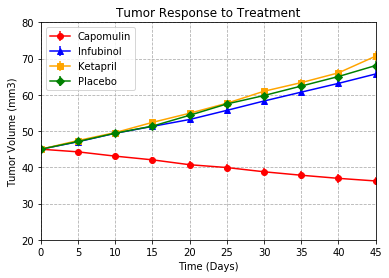

In [51]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45

error = tvdg_df["Standard Error"]["Capomulin"]
cap = plt.errorbar(x_axis, data["Capomulin"], yerr=error, fmt="o", ls="-", color="red")

error = tvdg_df["Standard Error"]["Infubinol"]
infu = plt.errorbar(x_axis, data["Infubinol"], yerr=error, fmt="^", ls="-", color="blue")

error = tvdg_df["Standard Error"]["Ketapril"]
keta = plt.errorbar(x_axis, data["Ketapril"], yerr=error, fmt="s", ls="-", color="orange")

error = tvdg_df["Standard Error"]["Placebo"]
plac = plt.errorbar(x_axis, data["Placebo"], yerr=error, fmt="D", ls="-", color="green")

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
# Save the Figure
plt.savefig("../Images/datagraph.png")


In [52]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [53]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_df.groupby("Drug")["Timepoint"].count()

# Convert to DataFrame
meta_response = combined_df.groupby(["Drug", "Timepoint"])
meta_mean = meta_response["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [54]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
meta_serror = meta_error.to_frame()
meta_serror = meta_serror.rename(columns= {"Metastatic Sites": "Standard Error"})
meta_serror = meta_serror.unstack(0)

# Convert to DataFrame
meta_serror = meta_error.to_frame()
meta_serror = meta_serror.rename(columns= {"Metastatic Sites": "Standard Error"})
meta_serror = meta_serror.unstack(0)

# Preview DataFrame
meta_serror.head()

Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10              0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15              0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20              0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [55]:
# Minor Data Munging to Re-Format the Data Frames
meta_data = meta_mean.unstack(0)
data2 = meta_data["Metastatic Sites"]

# Preview that Reformatting worked
data2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


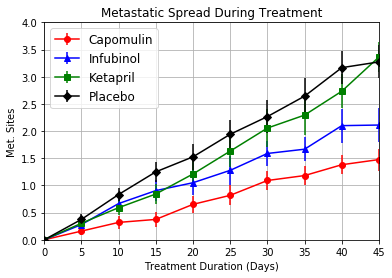

In [69]:
# Generate the Plot (with Error Bars)
error2 = meta_serror["Standard Error"]["Capomulin"]
cap2 = plt.errorbar(x_axis, data2["Capomulin"], yerr=error2, fmt="o", ls="-", color="red")

error2 = meta_serror["Standard Error"]["Infubinol"]
infu2 = plt.errorbar(x_axis, data2["Infubinol"], yerr=error2, fmt="^", ls="-", color="blue")

error2 = meta_serror["Standard Error"]["Ketapril"]
keta2 = plt.errorbar(x_axis, data2["Ketapril"], yerr=error2, fmt="s", ls="-", color="green")

error2 = meta_serror["Standard Error"]["Placebo"]
plac2 = plt.errorbar(x_axis, data2["Placebo"], yerr=error2, fmt="D", ls="-", color="black")

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.grid(linestyle="-")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Save the Figure
plt.savefig("../Images/data2graph.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [57]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()

# Convert to DataFrame
mice_survival = survival.to_frame()
mice_survival = mice_survival.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_survival.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [58]:
# Minor Data Munging to Re-Format the Data Frames
mice_data = mice_survival.unstack(0)
data3 = mice_data["Mouse Count"]

# Preview the Data Frame
data3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


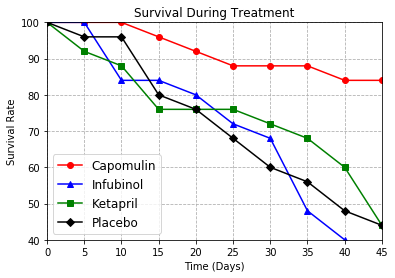

In [59]:
# Generate the Plot (Accounting for percentages)
cap3 = plt.errorbar(x_axis, (data3["Capomulin"]/25*100), fmt="o", ls="-", color="red")
infu3 = plt.errorbar(x_axis, (data3["Infubinol"]/25*100), fmt="^", ls="-", color="blue")
keta3 = plt.errorbar(x_axis, (data3["Ketapril"]/25*100),  fmt="s", ls="-", color="green")
plac3 = plt.errorbar(x_axis, (data3["Placebo"]/25*100),  fmt="D", ls="-", color="black")

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
# Save the Figure
plt.savefig("../Images/data3graph.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [60]:
# Calculate the percent changes for each drug
capchange = ((data["Capomulin"][45] - data["Capomulin"][0])/45)*100
ceftchange = ((data["Ceftamin"][45] - data["Ceftamin"][0])/45)*100
infuchange = ((data["Infubinol"][45] - data["Infubinol"][0])/45)*100
ketachange = ((data["Ketapril"][45] - data["Ketapril"][0])/45)*100
naftchange = ((data["Naftisol"][45] - data["Naftisol"][0])/45)*100
placchange = ((data["Placebo"][45] - data["Placebo"][0])/45)*100
propchange = ((data["Propriva"][45] - data["Propriva"][0])/45)*100
ramichange = ((data["Ramicane"][45] - data["Ramicane"][0])/45)*100
stelchange = ((data["Stelasyn"][45] - data["Stelasyn"][0])/45)*100
zonichange = ((data["Zoniferol"][45] - data["Zoniferol"][0])/45)*100

# Display the data to confirm
drug_change = pd.DataFrame({"Drug": ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
                               "Percent Change": [capchange, ceftchange, infuchange, ketachange, naftchange, placchange, propchange, ramichange, stelchange, zonichange]
                              })
drug_change

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


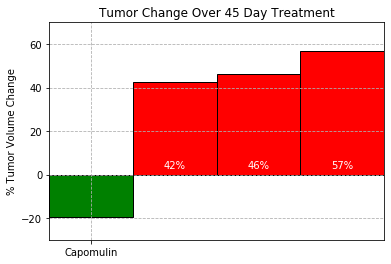

In [62]:
# Store all Relevant Percent Changes into a Tuple
rects1 = plt.bar(0, drug_change["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value+0.5 for value in x_axis]
plt.xticks(tick_locations, drug_change["Drug"])
plt.xlim(0, 4)
plt.ylim(-30, 70)

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white')

# Call functions to implement the function calls
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white')

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
# Save the Figure
plt.savefig("../Images/databargraph.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)